##    MP307 Practical 3 Discrete Population Models

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## Q.1(*) Geometric Population Model
Consider the geometric population model $P_{n+1}=(1+r)P_{n}$ for $n=0,1,\ldots$ with solution $
P_{n}=P_{0}e^{sn}$ for $s=\log (1+r)$ as a model of 
 1. Sweden's population with 11 samples from 1750 to 1960 
 2. The US population with 19 samples from 1790 to 1990.

 ### Population of Sweden
 The data (in millions) are given in the lists `Year` and `Pop` below.

In [2]:
Year = [1750, 1770, 1790, 1810, 1830, 1850, 1870, 1890, 1910, 1930, 1960]
Pop= [1.76, 2.03, 2.158, 2.378, 2.888, 3.48, 4.17, 4.785, 5.522, 6.14, 7.49]
len(Pop)

11

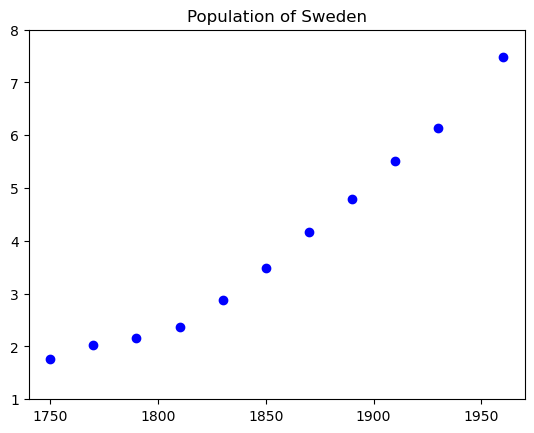

In [3]:
plt.figure(1)
plt.plot(Year,Pop,'bo')
plt.axis([1740,1970,1,8])
plt.title('Population of Sweden')
plt.show()

Look at t vs log(P):

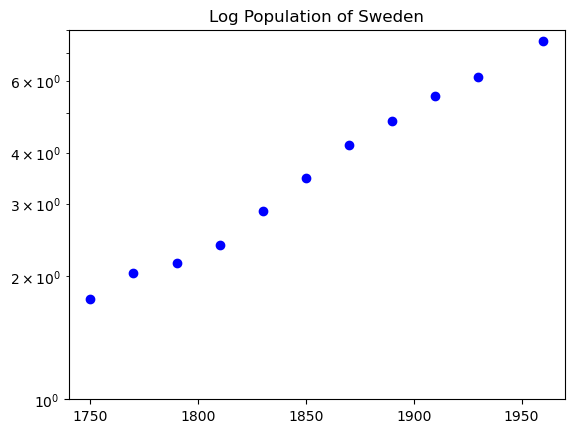

In [4]:
plt.figure(2) # new figure
plt.plot(Year,Pop,'bo')
plt.yscale("log")
plt.axis([1740,1970,1,8])
plt.title('Log Population of Sweden')
plt.show()

The log plot suggest a linear relationship to between $\log P$ and $t$ of the form $\log P(t)=st+b$ for some $s,b$. Thus $P(t)=P_{0}e^{st}$ with $P_{0}=\exp(b)$. 

In [5]:
log_Pop=np.log(Pop) # take log of each entry in S_Pop

In [6]:
print(log_Pop)

[0.56531381 0.70803579 0.76918187 0.8662598  1.06056422 1.24703229
 1.42791604 1.56548602 1.70874011 1.81482474 2.0135688 ]


Use a least squares approximation to find a line as explained in the notes for matching data $x_{i}$ to $y_{i}$.  

In [7]:
N=len(Year) # no of elements in S_Year
sumx=0; sumy=0; sumxx=0; sumxy=0; 
for i in range(N):
    sumx=sumx+Year[i]
    sumy=sumy+log_Pop[i]
    sumxx=sumxx+Year[i]**2
    sumxy=sumxy+log_Pop[i]*Year[i]
Xbar=sumx/N
Ybar=sumy/N
XXbar=sumxx/N
XYbar=sumxy/N

In [8]:
s=(XYbar-Xbar*Ybar)/(XXbar-Xbar**2)
b=(XXbar*Ybar-Xbar*XYbar)/(XXbar-Xbar**2)

P_0=np.exp(b)
print(s,P_0)

0.0072182711579564076 5.500654960458621e-06


Plot population $P(t)=P_{0}e^{st}$ vs $t$.

In [9]:
t=np.arange(1740.0,1970.,5.)
P_LS=P_0*np.exp(s*t) # least squares approximation

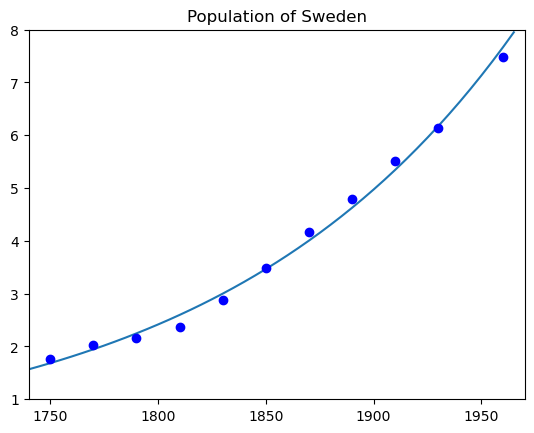

In [10]:
plt.figure(3)
plt.plot(t,P_LS)
plt.plot(Year,Pop,'bo')
plt.axis([1740,1970,1,8])
plt.title('Population of Sweden')
plt.show()

###  Repeat this analysis for the US population as follows:

In [11]:
Year = [1790, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]
Pop= [3.79, 9.6, 12.9, 17.1, 23.2, 31.4, 38.6, 50.2, 62.9, 76.0, 92.0, 106.5, 123.2, 132.0, 151.3, 179.3, 203.3, 226.54, 248.7]

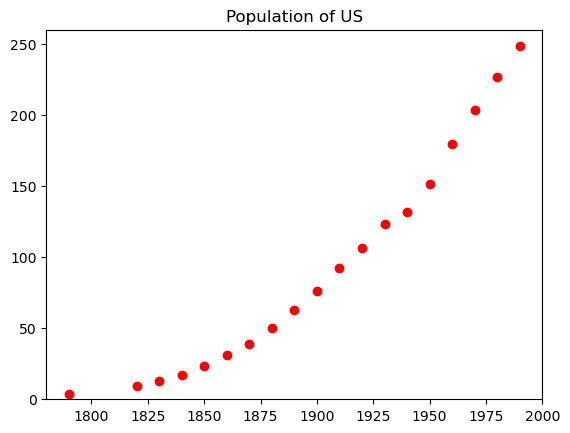

In [12]:
plt.figure(4)
plt.plot(Year,Pop,'ro')
plt.axis([1780,2000,0,260])
plt.title('Population of US')
plt.show()

In [13]:
log_Pop=np.log(Pop)

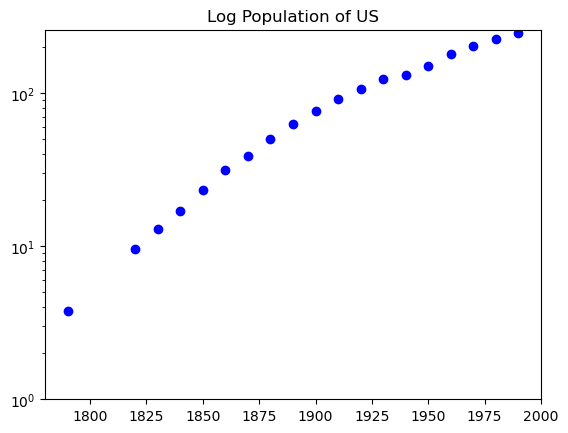

In [14]:
plt.figure(5) # new figure
plt.plot(Year,Pop,'bo')
plt.yscale("log")
plt.axis([1780,2000,1,260])
plt.title('Log Population of US')
plt.show()

In [15]:
N=len(Year) # no of elements in S_Year
sumx=0; sumy=0; sumxx=0; sumxy=0; 
for i in range(N):
    sumx=sumx+Year[i]
    sumy=sumy+log_Pop[i]
    sumxx=sumxx+Year[i]**2
    sumxy=sumxy+log_Pop[i]*Year[i]
Xbar=sumx/N
Ybar=sumy/N
XXbar=sumxx/N
XYbar=sumxy/N
s=(XYbar-Xbar*Ybar)/(XXbar-Xbar**2)
b=(XXbar*Ybar-Xbar*XYbar)/(XXbar-Xbar**2)

P_0=np.exp(b)
print(s,P_0)

t=np.arange(1780.0,2000.,5.)
P_LS=P_0*np.exp(s*t) # least squares approximation


0.020051106626461583 1.6718326017274779e-15


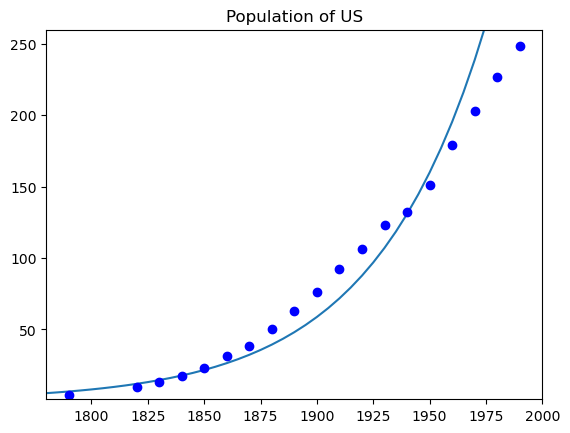

In [16]:
plt.figure(6)
plt.plot(t,P_LS)
plt.plot(Year,Pop,'bo')
plt.axis([1780,2000,1,260])
plt.title('Population of US')
plt.show()

## Q.2 (*) Discrete Verhulst Model
The general discrete Verhulst model of population growth is as follows 
$$
P_{n+1}=\dfrac{1+r}{1+\dfrac{rP_{n}}{K}}P_{n} 
$$
where $P_{n}\rightarrow K$ as $n\rightarrow \infty $. 

For the choice of
parameters $P_{0}=3.79$, $r=0.35$ and $K=300$ compare the Verhulst model to
the US population from 1790 to 1990. Explain what you see.

In [17]:
print(Year)

[1790, 1820, 1830, 1840, 1850, 1860, 1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990]


In [18]:
P_0=3.79
r=0.35
K=300.0

In [19]:
# plot Verhulst pop PV from 1790 to 1990 with 10 year intervals
PV=[0]*20 # list for Verhulst P initialized with 20 zeros
YV=[0]*20 # list for years initialized with 20 zeros

PV[0]=P_0
YV[0]=1790
# choose 10 year intervals
for n in range(1,20):
    YV[n]=1790+10*n
    PV[n]=(1+r)*PV[n-1]/(1+r*PV[n-1]/K) 
    

In [20]:
print(PV)

[3.79, 5.093976135520772, 6.836240197791433, 9.15590034404303, 12.229827865107413, 16.278010802773355, 21.56575898309768, 28.39924806493404, 37.10945741970735, 48.0188229724253, 61.386423256309854, 77.33325731948169, 95.76020718123476, 116.28490230208658, 138.23136107104716, 160.69678033606021, 182.69000801767106, 203.3004004123143, 221.83893811890553, 237.9088727981478]


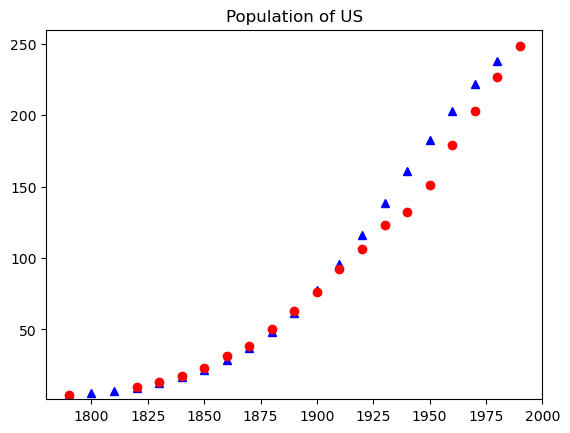

In [21]:
plt.figure(7)
plt.plot(YV,PV,'b^')
plt.plot(Year,Pop,'ro')
plt.axis([1780,2000,1,260])
plt.title('Population of US')
plt.show()

## Q.3 (*) Cohort Model
Consider the human population divided into three age groups $0-14$, $15-39$ and $\geq 40$
with population size $P_{i}$ , $i=1,2,3$ and yearly birth rates of 0, 0.06
and 0 and death rates of 0.005, 0.01 and 0.015, respectively.

(a). Show that ${\bf P}(t+1)={\bf AP}(t)$ where 
$${\bf P}=
\begin{bmatrix}
P_{1} \\ 
P_{2} \\ 
P_{3}%
\end{bmatrix} ,\quad {\bf A}=
\begin{bmatrix}
0.\,92867 & 0.06 & 0 \\ 
0.06\,63 & 0.\,9504 & 0 \\ 
0 & 0.0\,396 & 0.985%
\end{bmatrix}.$$

(b). Find the largest eigenvalue of ${\bf A}$ and describe the long-term
behaviour of this system.

(c). Consider the growth of the population with the following initial
populations. How long does it take for the total population to double in
each case?

$\quad$ (i)  $P_{1}=200$, $P_{2}=P_{3}=400$.
    
$\quad$   (ii) $P_{1}=400$, $P_{2}=P_{3}=300$.
    
$\quad$   (iii) $P_{1}=200$, $P_{2}=500$ and $P_{3}=300$.

Explain what you see.

In [22]:
b=[0, 0.06 ,0]
d=[0.005, 0.01, 0.015]

In [23]:
A=np.mat([[b[0] + 14/15*(1-d[0]), b[1], b[2]],
           [1/15*(1-d[0]), 24/25*(1-d[1]), 0],
           [0, 1/25*(1-d[1]), 1-d[2]]])
# recall Python indexing begins at 0

In [24]:
print(A)

[[0.92866667 0.06       0.        ]
 [0.06633333 0.9504     0.        ]
 [0.         0.0396     0.985     ]]


Find eigenvalues and eigenvectors

In [25]:
X, V=np.linalg.eig(A)
print(X) # eigen values
print(V) # columns are right eigenvectors

[0.985      1.00354962 0.87551705]
[[ 0.          0.32180453  0.72790385]
 [ 0.          0.40162787 -0.64479684]
 [ 1.          0.85740124  0.23322312]]


(b) Can extract first, second, third eigenvalues/vectors as follows:

In [26]:
lambda0=X[0]
u0=V[:,0] # This is a 3 by 1 matrix
print(lambda0,u0)

0.985 [[0.]
 [0.]
 [1.]]


In [27]:
np.matmul(A,u0)/lambda0 # A u = lambda u

matrix([[0.],
        [0.],
        [1.]])

In [28]:
lambda1=X[1]
u1=V[:,1]
print(lambda1)
print(u1)

1.0035496159842685
[[0.32180453]
 [0.40162787]
 [0.85740124]]


In [29]:
np.matmul(A,u1)/lambda1 # A u = lambda u

matrix([[0.32180453],
        [0.40162787],
        [0.85740124]])

In [30]:
lambda2=X[2]
u2=V[:,2]
print(lambda2,u2)

0.8755170506823979 [[ 0.72790385]
 [-0.64479684]
 [ 0.23322312]]


In [31]:
np.matmul(A,u2)/lambda2 # A u = lambda u

matrix([[ 0.72790385],
        [-0.64479684],
        [ 0.23322312]])

(c) Initial poplulation $P_{1}=P_{2}=P_{3}=100$.

In [32]:
P0=[100,100,100] 

In [33]:
np.matmul(A,P0) # population after one year

matrix([[ 98.86666667, 101.67333333, 102.46      ]])

In [34]:
n=20 # 20 years
An=np.linalg.matrix_power(A,n) # matrix A^n
print(An)

[[0.48657128 0.47022728 0.        ]
 [0.51986238 0.65689805 0.        ]
 [0.24436408 0.51787528 0.73913643]]


In [35]:
Pn=np.matmul(An,P0) # population after n years
print(Pn)

[[ 95.67985614 117.67604324 150.13757869]]


Define lists P1, P2, P3 giving population at time 0,1,2,3, etc

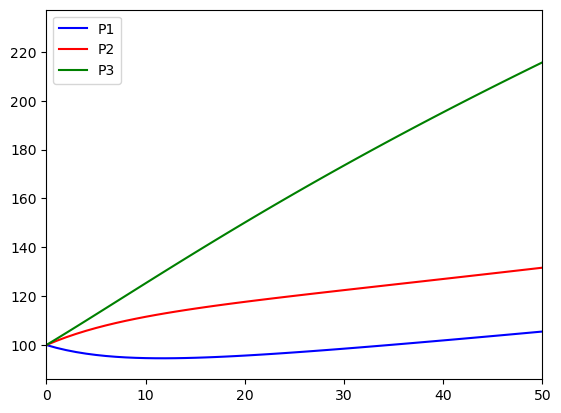

In [36]:
nit=50 # nit is no of time steps

#initialise list to zero

P1=[0]*(nit+1)
P2=[0]*(nit+1)
P3=[0]*(nit+1)

#Given initial population

P1[0],P2[0],P3[0]=100,100,100

# compute P1,P2,P3 
for n in range(1,nit+1):
    AP=np.matmul(A,[P1[n-1],P2[n-1],P3[n-1]]) # AP[n-1]
    P1[n],P2[n],P3[n]=AP[0,0],AP[0,1],AP[0,2]

# plotting 

t=np.arange(0,nit+1,1) #  time steps
plt.figure()
P1plot,=plt.plot(t,P1,'b-')
P2plot,=plt.plot(t,P2,'r-')
P3plot,=plt.plot(t,P3,'g-')
plt.legend((P1plot,P2plot,P3plot),('P1','P2','P3'))
Pmax=max(max(P1),max(P2),max(P3))
Pmin=min(min(P1),min(P1),min(P1))
plt.axis([0,nit,Pmin/1.1,Pmax*1.1])
plt.show()

Compare populations to eigenvector for largest eigenvalue

In [37]:
print(P2[50]/P1[50],u1[1,0]/u1[0,0]) # compare first and second cohorts to eigenvector entries

1.247744063179402 1.248049155293366


In [38]:
print(P3[50]/P1[50],u1[2,0]/u1[0,0]) # compare first and third cohorts to eigenvector entries

2.0444670328229053 2.664354161915348


## Q.4 (*) Chaotic Models 
Consider the Ricker model of Salmon population size as follows 

$$
P_{n+1}=re^{-\frac{P_{n}}{K}}P_{n} 
$$

where $r$ is the rate and $K$ is another parameter. For simplicity choose $K=500$ and consider the behaviour of this system for

(a). $r<1$, with initial population of $1000$.

(b). $1<r<e^{2}$, for initial population 100, 500 and 1000.

(c). $r>e^{2}$, for initial population 100, 500 and 1000.

Explain what you see.

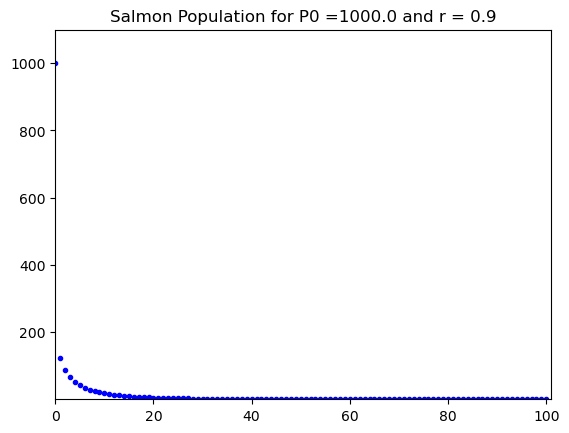

In [39]:
# initial values
P_0=1000.
K=500.
r=0.9



nit=100 # nit is no of time steps

t=np.arange(0,nit+1,1) #  time steps

P=[0]*(nit+1) # list for P initialized with nit zeros

P[0]=P_0 # given initial population
for n in range(1,nit+1):
    P[n]=r*P[n-1]*np.exp(-P[n-1]/K) 

# plotting 
plt.figure()
plt.plot(t,P,'b.')
Pmax=max(P)
Pmin=min(P)
plt.axis([0,nit+1,Pmin/1.1,Pmax*1.1])
plt.title('Salmon Population for P0 =' +str(P_0)+ ' and r = ' +str(r))
plt.show()

Population dies out for $r<1$. 

Explore the other values of $r$ where one can find convergence to non-zero population for $1<r<e^{2}$ and period doubling phenomena and chaos for $r>e^{2}$.

In [40]:
e2=np.exp(2)
print(e2)

7.38905609893065
